In [17]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore') 

In [18]:
symbol = "AAPL"
start = (datetime.today() - timedelta(days=730)).strftime('%Y-%m-%d')
end = datetime.today().strftime('%Y-%m-%d')

[*********************100%***********************]  1 of 1 completed


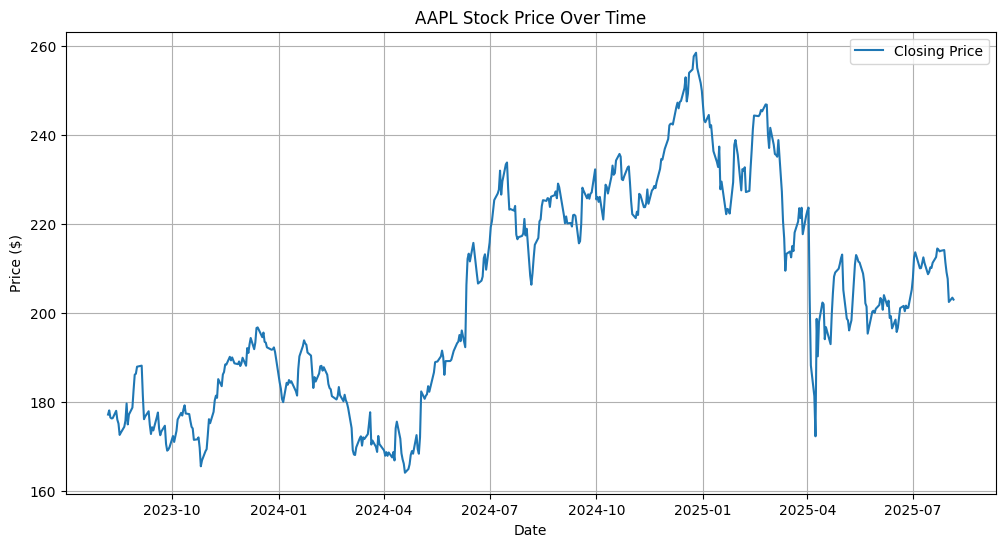

In [19]:

data = yf.download(symbol, start=start, end=end)
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
data.dropna(inplace=True)
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Closing Price')
plt.title(f"{symbol} Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()

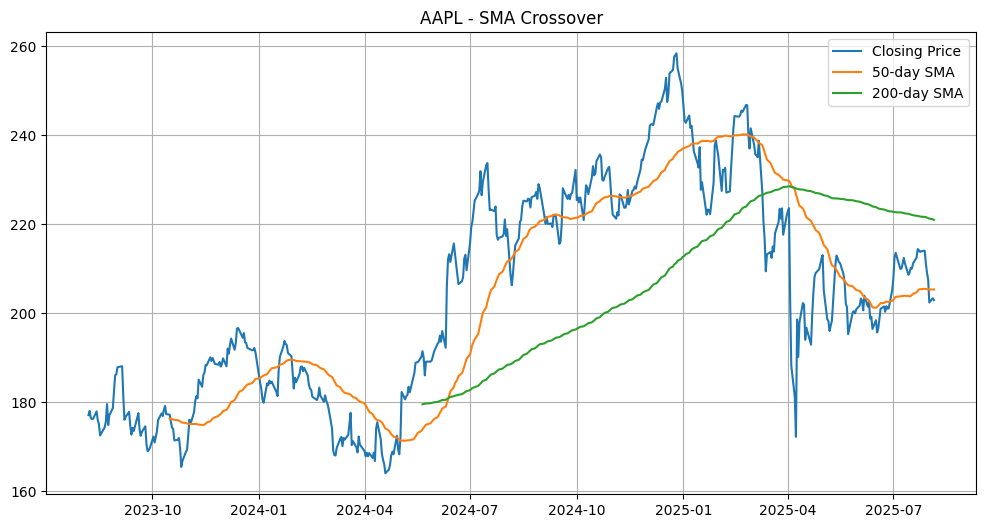

In [21]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['SMA50'], label='50-day SMA')
plt.plot(data['SMA200'], label='200-day SMA')
plt.title(f"{symbol} - SMA Crossover")
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Prepare data
data = data.reset_index()
data['Date_ordinal'] = pd.to_datetime(data['Date']).map(datetime.toordinal)

X = data[['Date_ordinal']]
y = data['Close']

In [23]:
# Model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [24]:
# Predict
data['Predicted_Close'] = model.predict(X)

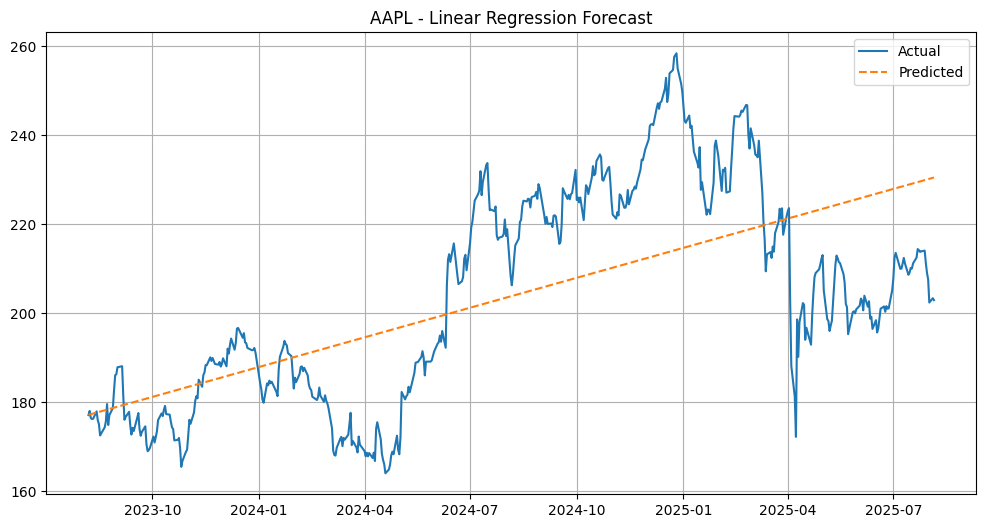

In [25]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Actual')
plt.plot(data['Date'], data['Predicted_Close'], label='Predicted', linestyle='--')
plt.title(f"{symbol} - Linear Regression Forecast")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Model Performance
rmse = np.sqrt(mean_squared_error(y, data['Predicted_Close']))
print(f"RMSE: {rmse:.2f}")

data = data['Close']


RMSE: 18.21


In [27]:
# Step 2: Calculate daily returns and statistics
daily_returns = data.pct_change().dropna()
mean_return = daily_returns.mean()
std_dev = daily_returns.std()


In [28]:

# Step 3: Monte Carlo Simulation
num_simulations = 1000
num_days = 252  # 1 trading year

simulation_df = pd.DataFrame()

for i in range(num_simulations):
    price_series = [data.iloc[-1]]
    for _ in range(num_days):
        next_price = price_series[-1] * np.exp(np.random.normal(mean_return, std_dev))
        price_series.append(next_price)
    simulation_df[i] = price_series

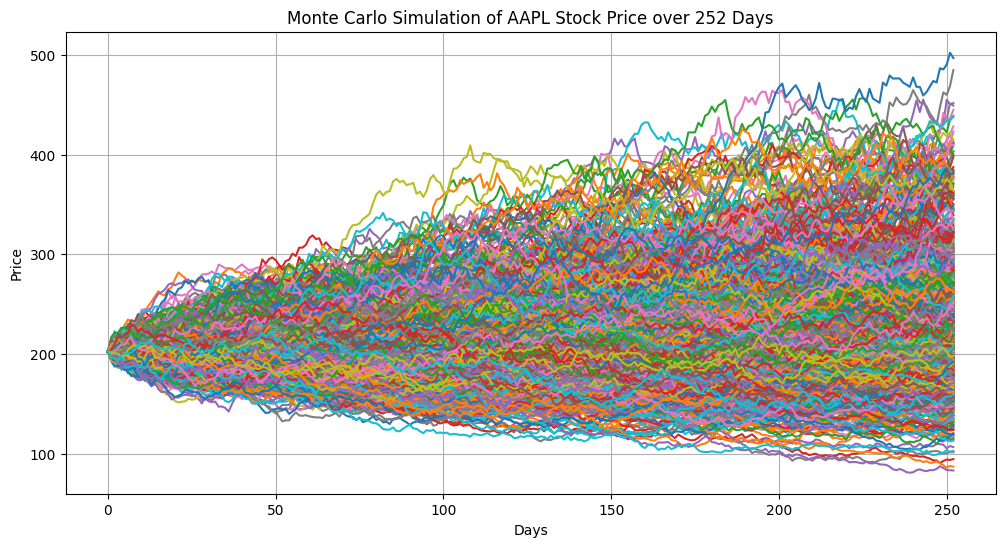

In [29]:
# Step 4: Plot the simulations
plt.figure(figsize=(12, 6))
plt.plot(simulation_df)
plt.title(f"Monte Carlo Simulation of {symbol} Stock Price over {num_days} Days")
plt.xlabel("Days")
plt.ylabel("Price")
plt.grid(True)
plt.show()